# Noise Filter Band Misinterpretation

### How band-specific analysis goes wrong

We're at the home stretch! These last couple of tutorials will discuss how various forms of analysis can go arwy and the proposed solutions offered in Voytek Lab.

In [3]:
%matplotlib inline
import matplotlib

import numpy as np

from fooof.synth import gen_power_spectrum
from fooof import FOOOF
from fooof.analysis import get_band_peak

from utils.plts import plot_fm_shading

## Individual Differences in Slope and Oscillations

Unfortunately, analysis of an individual's Power Spectral Density does not neccesarilly generalize to a broader population. This is because the features which comprise a Power Spectral Density can differ between people. Specifically, Power Spectral Densities have two main features - an ***aperiodic background*** which is the 1/f trendline and ***periodic oscillations*** which are "bumps" above the 1/f background. These two features often differ between people and Voytek Lab is working on determining if these features can reliably inform us about the individual eventhough there are differences between apparent power spectra.

Don't worry too much about the details of the following cell

In [7]:
# Define arguments to create Power Spectral Density
freq_range = [1,50]
bg_params = [0,1]
bg_params_2 = [0,3.14]
gauss_params = []
gauss_params_fr = [8,.5,1,25,.6,.9]

# Create fooof model
fm_osc = FOOOF()
fm_bg = FOOOF()
fm_2 = FOOOF()

# Generate synth psd settings
fs, ps = gen_power_spectrum(freq_range, bg_params, gauss_params)
fs_osc, ps_osc = gen_power_spectrum(freq_range, bg_params, gauss_params_fr)
fs_2, ps_2 = gen_power_spectrum(freq_range, bg_params_2, gauss_params)

# Add to fooof model
fm_bg.add_data(fs, ps)
fm_osc.add_data(fs_osc, ps_osc)
fm_2.add_data(fs_2, ps_2)


As mentioned above, one difference among individuals is the slope of their PSD could vary. This harkens to the previous tutorial about colored noise where β can take different values in the equation:
$$\frac{1}{f^{\beta}}$$

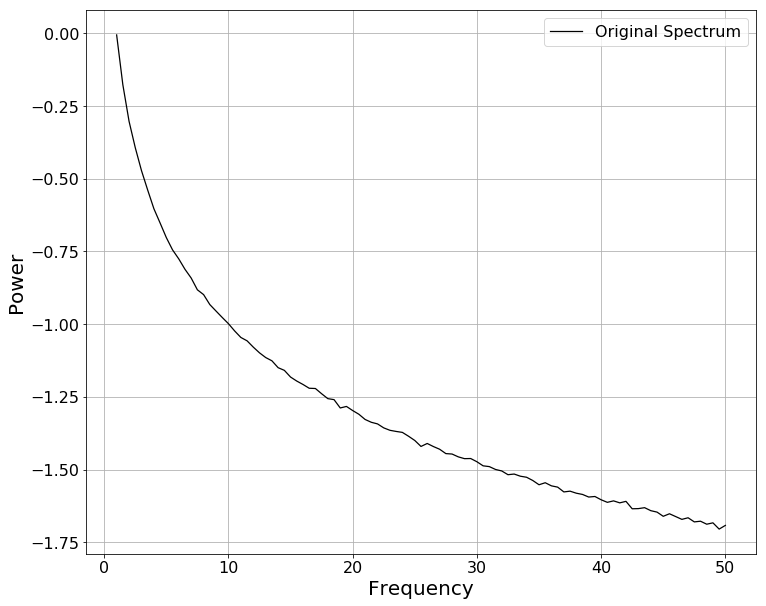

In [8]:
fm_bg.plot()

The above plot illustrates the ***aperiodic background*** and can vary across people by age, cognitive state, and task during recording.

While a difference in slope alone can introduce confounds in analysis, including oscillations in the picture further confounds analysis. The below plot illustrates the ***periodic oscillations*** above the ***aperiodic background***

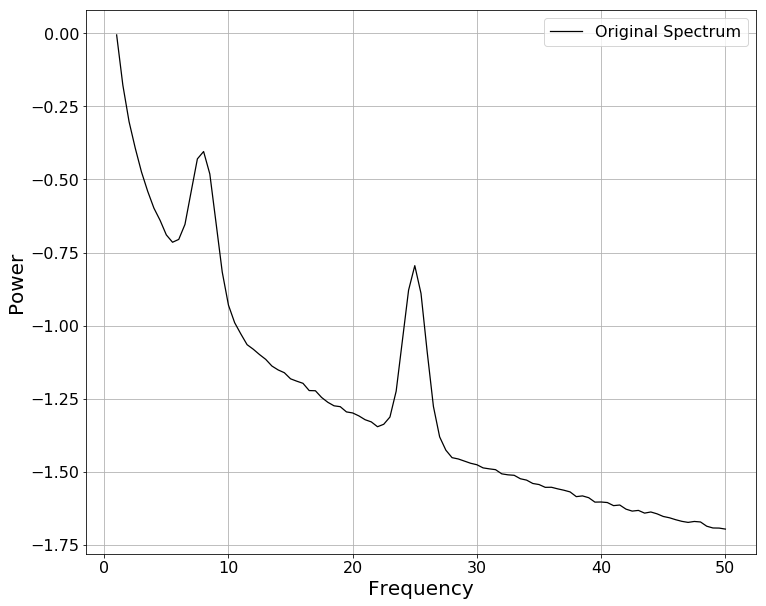

In [9]:
fm_osc.plot()

Individual differences in slope render analytic measures drawn from these Power Spectral Densities less reliable.
For example - consider that power within a band range is significantly change when slope is varied. Furthermore, the relationship between any two band's power changes. This ultimately introduces confounds in analysis and is likely to decrease external validity

## Individualized Frequency bands

Another way analyzing power spectra can go wrong is by using defined frequency bands. Cannonically, frequency bands such as the Alpha band have been set at [8,12]Hz. However, individuals can have a personal shift in these bands. For example, some people can have a slow peak alpha which can range from [6,10]Hz. This is a problem because oscillations might not land perfectly in the confines of the band and thus further analysis might miss out on characteristics of the oscillation.

Below, the shaded areas are the cannonically alpha and beta band([8,12] , [15,25]) notice that the oscillations are ***NOT*** captured with the pre defined bands

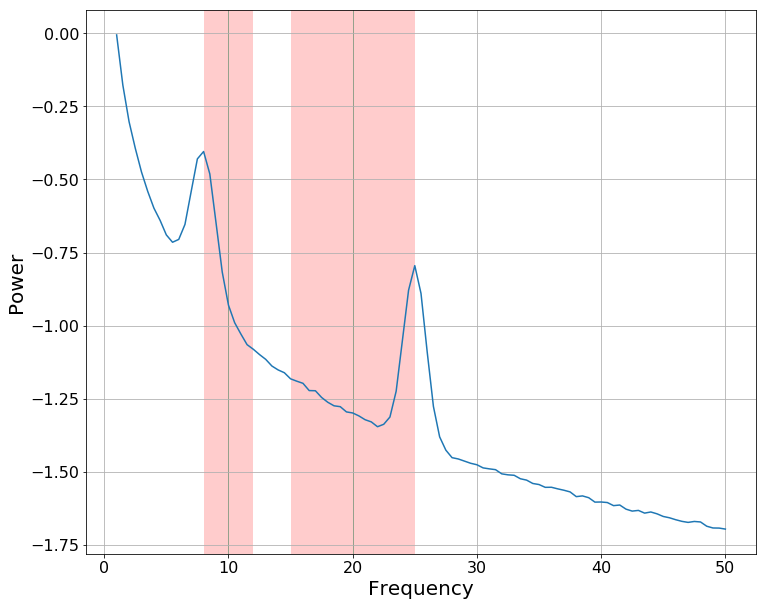

In [10]:
plot_fm_shading(fm_osc,[10, 20], [2, 5])

tl;dr - Analysis of neural power spectra is hazy because differences in individuals' slope and oscillatory patterns cause the comparison of two power density spectrums less valid. Here is Voyte Lab's solution to this problem [Fooof](https://github.com/voytekresearch/fooof).